# SVM for classification

Load IRIS dataset, check its contents:


In [7]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[0:5])
#print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


Split data into training and testing parts:

In [2]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


Use a Support Vector Machine for classification:


In [9]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

1.0

Let's explore more now.

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



In [4]:
# Select only first two features
X = iris.data[:, :2]
y = iris.target

In [11]:
import numpy as np

mask = y != 2
X = X[mask]
y = y[mask]

print("Shape of X:", X.shape)
print("Remaining classes:", np.unique(y))


Shape of X: (100, 2)
Remaining classes: [0 1]


Plot scatterplots of targets 0 and 1 and check the separability of the classes:

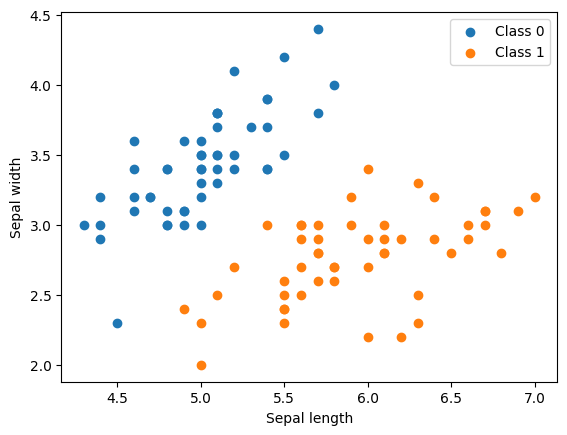

In [12]:
import matplotlib.pyplot as plt

# Separate the two classes
X_class0 = X[y == 0]
X_class1 = X[y == 1]

# Scatter plot
plt.scatter(X_class0[:, 0], X_class0[:, 1], label="Class 0")
plt.scatter(X_class1[:, 0], X_class1[:, 1], label="Class 1")

plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.legend()
plt.show()


Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

In [16]:
# Split the filtered data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM with default C
print("SVM with default C:")
SVMmodel_default = SVC(kernel='linear')
SVMmodel_default.fit(X_train, y_train)
score_default = SVMmodel_default.score(X_test, y_test)
print(f"Accuracy: {score_default:.4f}")

# Train SVM with C=200
print("\nSVM with C=200:")
SVMmodel_C200 = SVC(kernel='linear', C=200)
SVMmodel_C200.fit(X_train, y_train)
score_C200 = SVMmodel_C200.score(X_test, y_test)
print(f"Accuracy: {score_C200:.4f}")

# Store the best model for visualization
SVMmodel = SVMmodel_C200

SVM with default C:
Accuracy: 1.0000

SVM with C=200:
Accuracy: 1.0000


Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

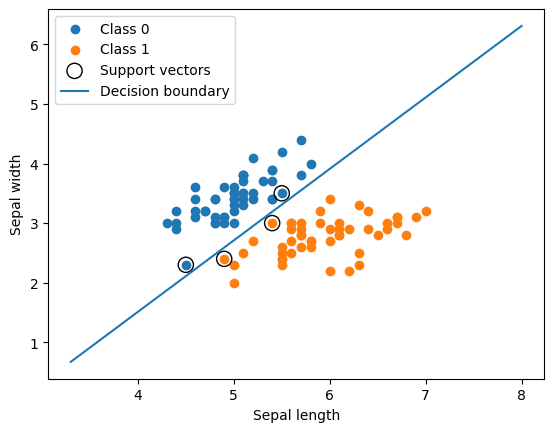

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Support vectors
supvectors = SVMmodel.support_vectors_

# Separating line coefficients
W = SVMmodel.coef_[0]
b = SVMmodel.intercept_[0]

# Plot data points
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1")

# Plot support vectors
plt.scatter(
    supvectors[:, 0],
    supvectors[:, 1],
    s=120,
    facecolors='none',
    edgecolors='k',
    label="Support vectors"
)

# Decision line: w0*x + w1*y + b = 0  ->  y = -(w0*x + b)/w1
x_vals = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 200)
y_vals = -(W[0] * x_vals + b) / W[1]

plt.plot(x_vals, y_vals, label="Decision boundary")

plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.legend()
plt.show()


# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

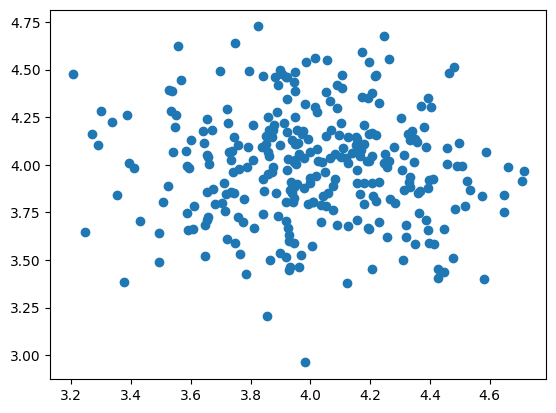

In [19]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()



Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

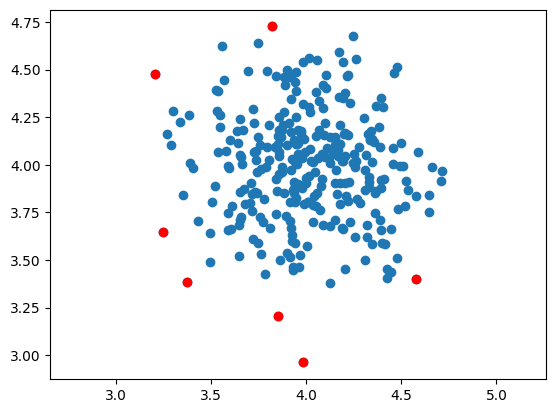

In [21]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)


SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()



Plot the support vectors:

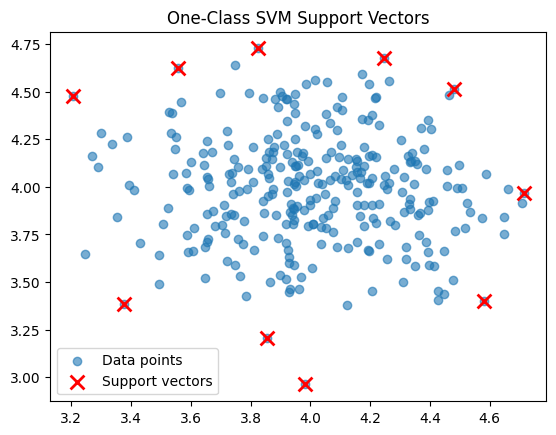

In [22]:
# Plot support vectors from OneClassSVM
support_vectors = SVMmodelOne.support_vectors_

plt.scatter(x[:, 0], x[:, 1], label='Data points', alpha=0.6)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], color='red', s=100, marker='x', label='Support vectors', linewidths=2)
plt.legend()
plt.title('One-Class SVM Support Vectors')
plt.show()

What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

8.987833799021839


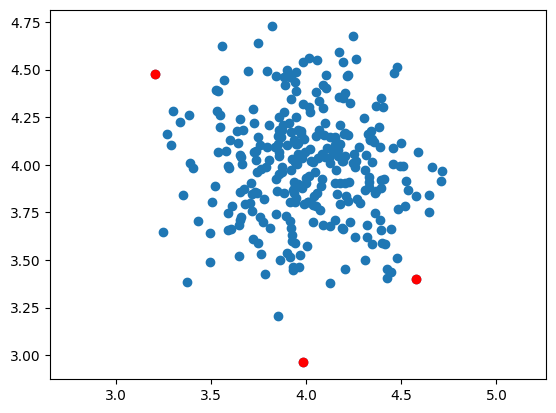

In [23]:
scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, 0.01)
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()